In [4]:
import pandas as pd


In [5]:
df = pd.read_csv('housepricedata.csv')

In [6]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [7]:
dataset = df.values

In [8]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [9]:
X = dataset[:,0:10]

In [10]:
Y = dataset[:,10]

In [11]:
from sklearn import preprocessing

In [12]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [15]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [16]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [17]:
from keras.models import Sequential
from keras.layers import Dense

In [18]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [22]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8904


0.8904109597206116

In [26]:
# Visualizing Loss and Accuracy 


import matplotlib.pyplot as plt

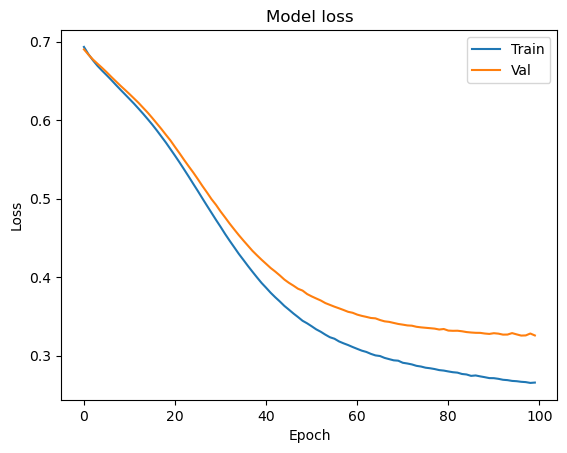

In [37]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

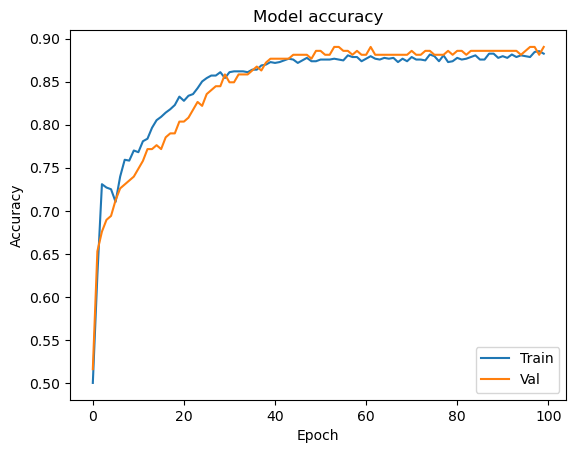

In [42]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [24]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 14ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6900 - val_accuracy: 0.5160
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6837 - accuracy: 0.6252 - val_loss: 0.6832 - val_accuracy: 0.6530
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6759 - accuracy: 0.7309 - val_loss: 0.6770 - val_accuracy: 0.6758
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6689 - accuracy: 0.7270 - val_loss: 0.6716 - val_accuracy: 0.6895
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6628 - accuracy: 0.7250 - val_loss: 0.6664 - val_accuracy: 0.6941
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6570 - accuracy: 0.7104 - val_loss: 0.6609 - val_accuracy: 0.7123
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6511 - accuracy: 0.7397 - val_loss: 0.6550 - val_accuracy: 0.7260
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3136 - accuracy: 0.8787 - val_loss: 0.3559 - val_accuracy: 0.8858
Epoch 60/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3111 - accuracy: 0.8738 - val_loss: 0.3547 - val_accuracy: 0.8813
Epoch 61/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3087 - accuracy: 0.8767 - val_loss: 0.3523 - val_accuracy: 0.8813
Epoch 62/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3065 - accuracy: 0.8796 - val_loss: 0.3507 - val_accuracy: 0.8904
Epoch 63/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3048 - accuracy: 0.8767 - val_loss: 0.3494 - val_accuracy: 0.8813
Epoch 64/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3024 - accuracy: 0.8757 - val_loss: 0.3481 - val_accuracy: 0.8813
Epoch 65/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3004 - accuracy: 0.8777 - val_loss: 0.3476 - val_accuracy: 0.8813
Epoch 

In [35]:
#Adding Regularization to our Neural Network

#We'll train a model which will overfit, which we call Model 2. This might take a few minutes.
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 36ms/step - loss: 0.4781 - accuracy: 0.7789 - val_loss: 0.4856 - val_accuracy: 0.7626
Epoch 2/100
32/32 [==============================] - 1s 29ms/step - loss: 0.3391 - accuracy: 0.8532 - val_loss: 0.3428 - val_accuracy: 0.8858
Epoch 3/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3207 - accuracy: 0.8738 - val_loss: 0.3408 - val_accuracy: 0.8767
Epoch 4/100
32/32 [==============================] - 1s 29ms/step - loss: 0.2650 - accuracy: 0.8836 - val_loss: 0.3973 - val_accuracy: 0.8630
Epoch 5/100
32/32 [==============================] - 1s 29ms/step - loss: 0.2718 - accuracy: 0.8826 - val_loss: 0.3436 - val_accuracy: 0.8767
Epoch 6/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3044 - accuracy: 0.8689 - val_loss: 0.4211 - val_accuracy: 0.8402
Epoch 7/100
32/32 [==============================] - 1s 29ms/step - loss: 0.2474 - accuracy: 0.8924 - val_loss: 0.3378 - val_accuracy: 0.8904
Epoch 

32/32 [==============================] - 1s 35ms/step - loss: 0.1481 - accuracy: 0.9374 - val_loss: 0.4645 - val_accuracy: 0.8858
Epoch 59/100
32/32 [==============================] - 1s 33ms/step - loss: 0.1657 - accuracy: 0.9286 - val_loss: 0.4229 - val_accuracy: 0.8904
Epoch 60/100
32/32 [==============================] - 1s 30ms/step - loss: 0.1405 - accuracy: 0.9393 - val_loss: 0.3757 - val_accuracy: 0.8858
Epoch 61/100
32/32 [==============================] - 1s 31ms/step - loss: 0.1568 - accuracy: 0.9462 - val_loss: 0.3707 - val_accuracy: 0.9041
Epoch 62/100
32/32 [==============================] - 1s 32ms/step - loss: 0.1820 - accuracy: 0.9227 - val_loss: 0.4195 - val_accuracy: 0.8995
Epoch 63/100
32/32 [==============================] - 1s 29ms/step - loss: 0.1486 - accuracy: 0.9413 - val_loss: 0.5318 - val_accuracy: 0.8950
Epoch 64/100
32/32 [==============================] - 1s 28ms/step - loss: 0.1515 - accuracy: 0.9354 - val_loss: 0.4360 - val_accuracy: 0.8995
Epoch 65/100

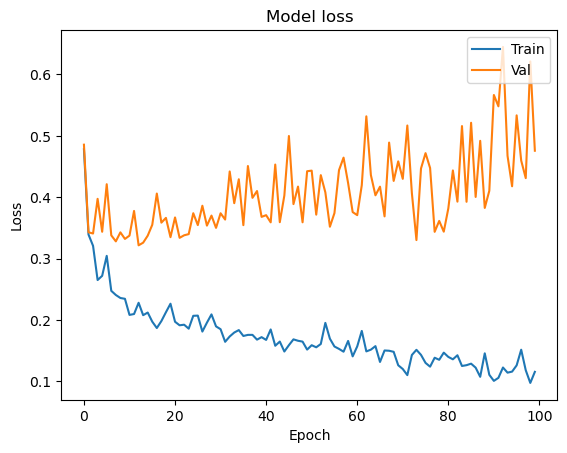

In [38]:
#We want to visualize the training loss and the validation loss like this:

plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


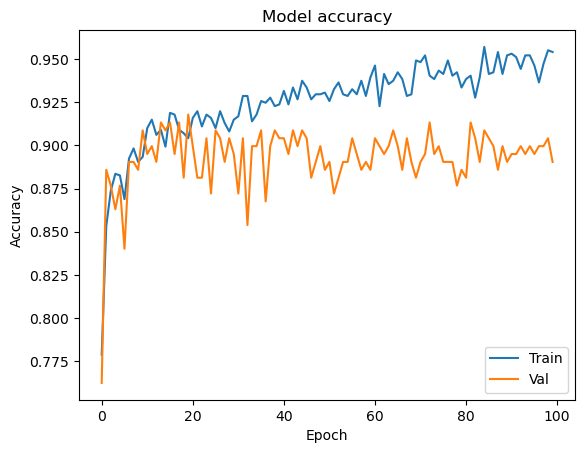

In [41]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [43]:
from keras.layers import Dropout
from keras import regularizers

In [44]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [45]:
kernel_regularizer=regularizers.l2(0.01)
Dropout(0.3),

(<keras.layers.core.dropout.Dropout at 0x25913d118a0>,)

In [46]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 4s 55ms/step - loss: 14.2335 - accuracy: 0.6067 - val_loss: 3.9539 - val_accuracy: 0.7580
Epoch 2/100
32/32 [==============================] - 1s 39ms/step - loss: 1.6780 - accuracy: 0.8200 - val_loss: 0.6677 - val_accuracy: 0.8858
Epoch 3/100
32/32 [==============================] - 1s 43ms/step - loss: 0.5808 - accuracy: 0.8454 - val_loss: 0.6954 - val_accuracy: 0.7169
Epoch 4/100
32/32 [==============================] - 1s 43ms/step - loss: 0.5368 - accuracy: 0.8552 - val_loss: 0.6081 - val_accuracy: 0.8356
Epoch 5/100
32/32 [==============================] - 1s 40ms/step - loss: 0.5067 - accuracy: 0.8620 - val_loss: 0.5082 - val_accuracy: 0.8721
Epoch 6/100
32/32 [==============================] - 1s 39ms/step - loss: 0.4760 - accuracy: 0.8718 - val_loss: 0.5312 - val_accuracy: 0.8265
Epoch 7/100
32/32 [==============================] - 1s 41ms/step - loss: 0.4960 - accuracy: 0.8630 - val_loss: 0.4905 - val_accuracy: 0.8813
Epoch

32/32 [==============================] - 1s 40ms/step - loss: 0.4181 - accuracy: 0.8845 - val_loss: 0.4829 - val_accuracy: 0.8767
Epoch 59/100
32/32 [==============================] - 1s 40ms/step - loss: 0.4194 - accuracy: 0.8924 - val_loss: 0.4579 - val_accuracy: 0.8950
Epoch 60/100
32/32 [==============================] - 1s 44ms/step - loss: 0.4178 - accuracy: 0.8855 - val_loss: 0.4568 - val_accuracy: 0.8904
Epoch 61/100
32/32 [==============================] - 1s 47ms/step - loss: 0.4308 - accuracy: 0.8845 - val_loss: 0.4597 - val_accuracy: 0.8950
Epoch 62/100
32/32 [==============================] - 1s 42ms/step - loss: 0.4302 - accuracy: 0.8865 - val_loss: 0.4576 - val_accuracy: 0.8995
Epoch 63/100
32/32 [==============================] - 1s 45ms/step - loss: 0.4141 - accuracy: 0.8836 - val_loss: 0.4582 - val_accuracy: 0.8950
Epoch 64/100
32/32 [==============================] - 1s 41ms/step - loss: 0.4152 - accuracy: 0.8885 - val_loss: 0.4700 - val_accuracy: 0.8858
Epoch 65/100

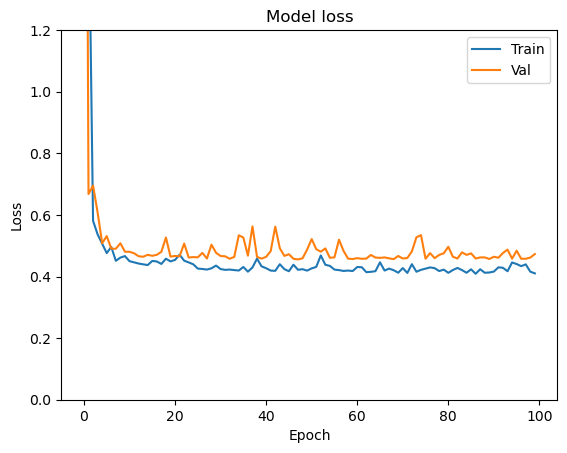

In [51]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

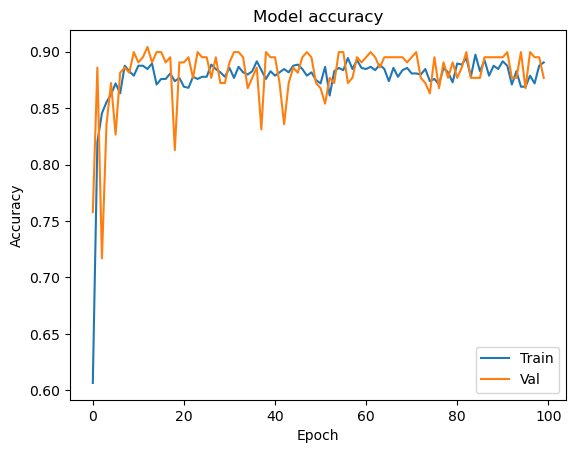

In [53]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
#Consolidated Summary: In this post, we’ve written Python code to:

Explore and Process the Data
Build and Train our Neural Network
Visualize Loss and Accuracy
Add Regularization to our Neural Network
 visualize the training / validation loss and accuracy  has helped deal with overfitting!